##### ① https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f
##### ② https://qiita.com/everylittle/items/b6f08891c1da41f30b24
##### ③ https://qiita.com/kenta1984/items/bad75a37d552510e4682
##### ④ https://sagantaf.hatenablog.com/entry/2019/06/04/225239
##### ⑤ https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pwd
%cd /content/drive/MyDrive/LSTM\ project/LSTM

/content
/content/drive/MyDrive/LSTM project/LSTM


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [ ]:
df1=pd.read_csv("AAPL(multi).csv")
del df1['Adj Close']
print("Number of rows and columns:", df1.shape)


Number of rows and columns: (1006, 6)
         Date       Open       High        Low      Close     Volume
0  2017-01-03  28.950001  29.082500  28.690001  29.037500  115127600
1  2017-01-04  28.962500  29.127501  28.937500  29.004999   84472400
2  2017-01-05  28.980000  29.215000  28.952499  29.152500   88774400


,Date,Open,High,Low,Close,Volume
700,2019-10-15,59.097500,59.412498,58.720001,58.830002,87360000
701,2019-10-16,58.342499,58.810001,58.299999,58.592499,73903200
702,2019-10-17,58.772499,59.037498,58.380001,58.820000,67585200


In [ ]:
# ectract data except for date
training_set = df1.iloc[:754, 1:6].values
test_set = df1.iloc[754:, 1:6].values
training_set[0]

array([2.8950001e+01, 2.9082500e+01, 2.8690001e+01, 2.9037500e+01,
       1.1512760e+08])

In [ ]:
training_set[:,0:4]

array([[28.950001, 29.0825  , 28.690001, 29.0375  ],
       [28.9625  , 29.127501, 28.9375  , 29.004999],
       [28.98    , 29.215   , 28.952499, 29.1525  ],
       ...,
       [72.779999, 73.4925  , 72.029999, 72.449997],
       [72.364998, 73.172501, 71.305   , 72.879997],
       [72.482498, 73.419998, 72.379997, 73.412498]])

In [ ]:
# Feature Scaling
# m = MinMaxScaler()
ss = StandardScaler()
training_set_scaled1=ss.fit_transform(training_set[:,0:4])
# print(training_set_scaled1[0:3])
# print(training_set_scaled1[700:703])
training_set_scaled2=ss.fit_transform(training_set[:,4:5])
# print(training_set_scaled2[0])

training_set_scaled = np.hstack((training_set_scaled1, training_set_scaled2))
print(training_set_scaled1.shape)
print(training_set_scaled2.shape)
print(training_set_scaled.shape)
# [print(training_set_scaled[0:3])]

(754, 4)
(754, 1)
(754, 5)


In [ ]:
# Creating a data structure with 60 time-steps
X_train=[]
y_train_open=[]
y_train_high=[]
y_train_low=[]
y_train_close=[]
y_train_volume=[]
#ここでは０は Open
for i in range(60, 754): 
  X_train.append(training_set_scaled[i-60: i, :])
  y_train_open.append(training_set_scaled[i, 0])
  y_train_high.append(training_set_scaled[i, 1])
  y_train_low.append(training_set_scaled[i, 2])
  y_train_close.append(training_set_scaled[i, 3])
  y_train_volume.append(training_set_scaled[i, 4])

X_train=np.array(X_train)
y_train_open=np.array(y_train_open)
y_train_high=np.array(y_train_high)
y_train_low=np.array(y_train_low)
y_train_close=np.array(y_train_close)
y_train_volume=np.array(y_train_volume)

print(f"X_train, y_train = {X_train.shape} {y_train_open.shape}")
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# print(f"X_train = {X_train[0]}")
# print(f"y_train_open = {y_train_open[0]}")
#(694, 60, 1)  need 3d inputs


X_train, y_train = (694, 60, 5) (694,)


In [ ]:
model_list = []
y_train = [y_train_open, y_train_high, y_train_low, y_train_close, y_train_volume]
ind = ["<Open>", "<High>", "<Low>", "<Close>", "<Volume>" ]
for i in range(5):
  print(ind[i])
  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  # ここのinput_shapeで入力次元を設定する
  model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))

  # Compiling the RNN
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')

  # Fitting the RNN to the Training set
  model.fit(X_train, y_train[i], epochs = 30, batch_size = 32)
  model_list.append(model)
  print("")

In [ ]:
# Getting the predicted stock price 
dataset_train = df1.iloc[:754, 1:6]
dataset_test = df1.iloc[754:, 1:6]
print(f"dataset_train = {dataset_train.shape}, dataset_test = {dataset_test.shape}")
# print(f"dataset_test.values = {dataset_test.values[:,0:1]}")
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0) 
print(f"dataset_total = {dataset_total.shape}")

# ここで、test用にのデータを改めて作成している
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(f"inputs = {inputs.shape}")

## 以下複数normをする目的は、最後のvisualisationで要素毎にinverseする必要がある
s_open = StandardScaler()
ss_open = s_open.fit_transform(inputs[:,0:1])

s_high = StandardScaler()
ss_high = s_high.fit_transform(inputs[:,1:2])

s_low = StandardScaler()
ss_low = s_low.fit_transform(inputs[:,2:3])

s_close = StandardScaler()
ss_close = s_close.fit_transform(inputs[:,3:4])

s_volume = StandardScaler()
ss_volume = s_volume.fit_transform(inputs[:,4:5])


# X_testの実験用に全てをcombineしている
ss=StandardScaler()
ss_others=ss.fit_transform(inputs[:,0:4])
ss_volume=ss.fit_transform(inputs[:,4:5])
hstack=np.hstack((ss_others, ss_volume))

inputs2=ss.fit_transform(hstack) #(252, 5)
print(f"inputs2 = {inputs2.shape}")

X_test = []
# for j in range(inputs.shape[1]):
# testデータも全ての5要素をinputとして使う
for i in range(60, 312):
  X_test.append(inputs2[i-60:i, :])

X_test = np.array(X_test)
print(X_test.shape)

# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape) # need 3d 
# (252, 60, 5)

# print(f"X_test={X_test[0]}")

dataset_train = (754, 5), dataset_test = (252, 5)
dataset_total = (1006, 5)
inputs = (312, 5)
inputs2 = (312, 5)
(252, 60, 5)
(252, 60, 5)


In [ ]:
p1 = np.array(model_list[0].predict(X_test))
p2 = np.array(model_list[1].predict(X_test))
p3 = np.array(model_list[2].predict(X_test))
p4 = np.array(model_list[3].predict(X_test))
p5 = np.array(model_list[4].predict(X_test))

print(p1.shape)

""" Inverse(for visualisation) """
# inverseするときは最後の直前の変換の型を指定しないとエラーが出る
p1 = s_open.inverse_transform(p1) 
p2 = s_high.inverse_transform(p2) 
p3 = s_low.inverse_transform(p3) 
p4 = s_close.inverse_transform(p4) 
p5 = s_volume.inverse_transform(p5) 
print(p1[0])
print(p1.shape)

(252, 1)
[73.17136]
(252, 1)


R2[Apple]=0.8985513029818334


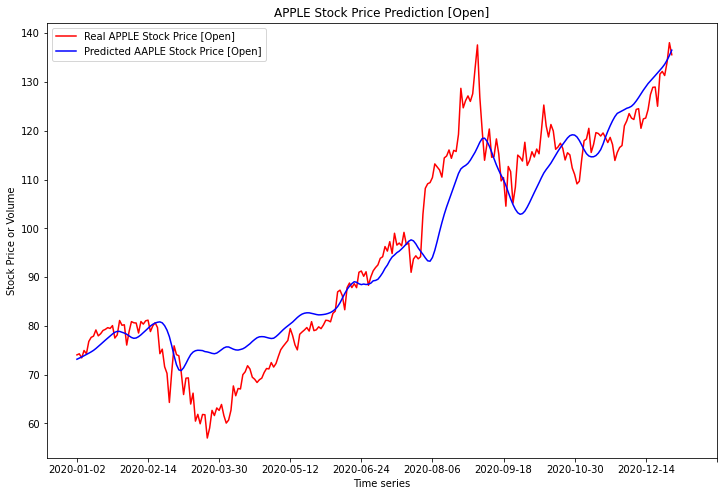

R2[Apple]=0.9368297232935654


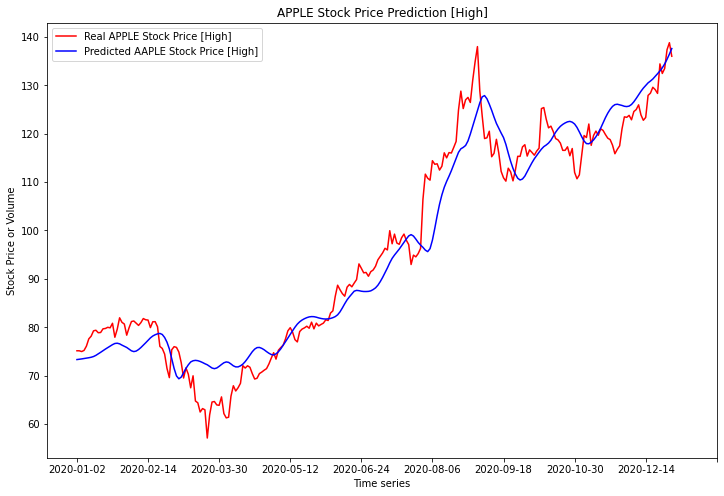

R2[Apple]=0.925593202658638


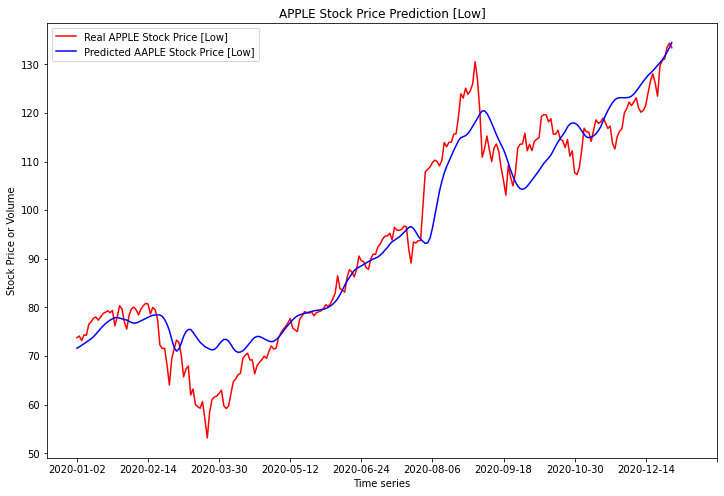

R2[Apple]=0.9172176686570783


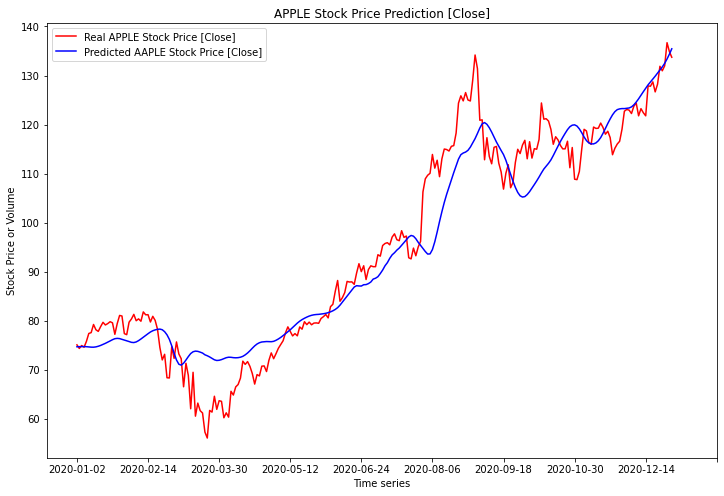

R2[Apple]=0.036199516516259966


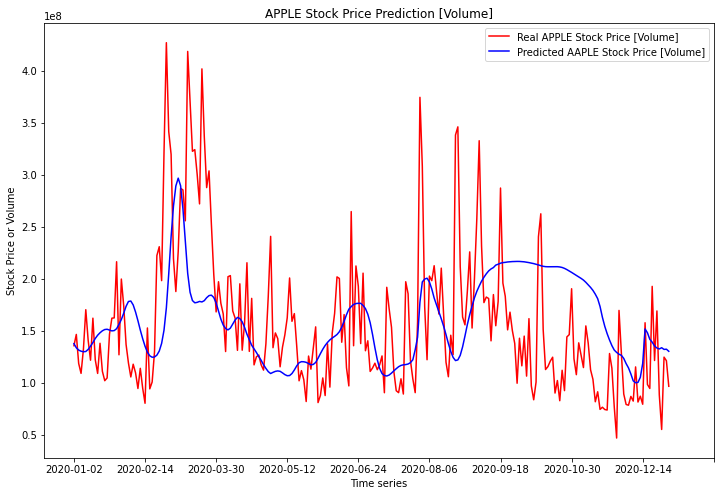

In [ ]:
# Visualising the results <Lag1>
preds_list = [p1,p2,p3,p4,p5]
actual_label=["Real APPLE Stock Price [Open]","Real APPLE Stock Price [High]","Real APPLE Stock Price [Low]","Real APPLE Stock Price [Close]","Real APPLE Stock Price [Volume]"]
preds_label=["Predicted AAPLE Stock Price [Open]", "Predicted AAPLE Stock Price [High]", 
             "Predicted AAPLE Stock Price [Low]", "Predicted AAPLE Stock Price [Close]", "Predicted AAPLE Stock Price [Volume]"]
title=["APPLE Stock Price Prediction [Open]", "APPLE Stock Price Prediction [High]", "APPLE Stock Price Prediction [Low]", 
       "APPLE Stock Price Prediction [Close]", "APPLE Stock Price Prediction [Volume]"]      
R2 = ["Open", "High", "Low", "Close", "Volume"]

for i in range(5):
  plt.figure(figsize=(12,8)) #754
  plt.plot(df1.loc[754:,'Date'], dataset_test.values[:, i:i+1], color='red', label=actual_label[i])
  plt.plot(df1.loc[754:,'Date'], preds_list[i], color='blue', label=preds_label[i])

  from sklearn.metrics import r2_score

  plt.xticks(np.arange(0,300,30))
  plt.title(title[i])
  plt.xlabel('Time series')
  plt.ylabel('Stock Price or Volume')

  print(f"R2[{R2[i]}]={r2_score(dataset_test.values[:,i:i+1].flatten(), preds_list[i].flatten())}")
  plt.legend()
  plt.show()